In [1]:
from __future__ import absolute_import, division, print_function
from sklearn.model_selection import train_test_split
from math import sqrt
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import keras
import os
import time

Using TensorFlow backend.


# Pick some data

In [2]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/US_multi/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 10) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()


500


In [3]:
# %%time
data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

In [6]:
# Hyper-parameters
epochs = 10         # This should be adjusted
batch_size = 128    # The larger the faster
learning_rate = 0.001

class Model_FC:    
    def forward(inputs):
        x = keras.layers.Dense(128, activation=tf.nn.relu)(inputs)
        x = keras.layers.Dense(64, activation=tf.nn.relu)(x)
        x = keras.layers.Dense(32, activation=tf.nn.relu)(x)
        x = keras.layers.Dense(16, activation=tf.nn.relu)(x)
        x = keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
        return x
    
    def build():
        inputs = keras.layers.Input(shape=(X.shape[1],))
        outputs = Model_FC.forward(inputs)
        model = keras.Model(inputs=inputs, outputs=outputs)
        return model

model = Model_FC.build()
optimizer = keras.optimizers.Adam(learning_rate)
model.compile(loss='binary_crossentropy', 
              optimizer=optimizer, 
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 17        
Total params: 15,105
Trainable params: 15,105
Non-trainable params: 0
_______________________________________________________

In [7]:
model.load_weights('weightsAfterUS_multi_FINALWEIGHTS.hdf5')

In [8]:
y_pred = model.predict(X)
# Compare this with y_val to get score

# ROC Graph???

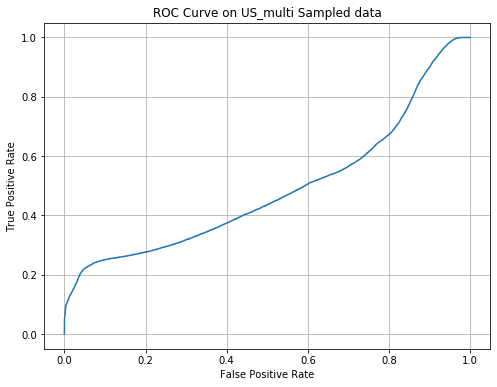

In [10]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, y_pred)
#plt.plot(fpr, tpr)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_1000)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve on US_multi Sampled data")
plt.grid()
plt.show()

# now for JAMSTEC

In [11]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/JAMSTEC/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 10) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

500


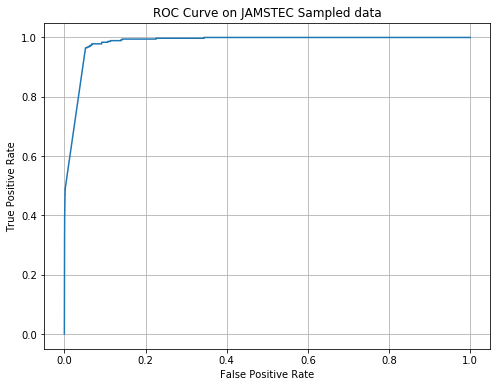

In [13]:
y_pred = model.predict(X)

from sklearn.metrics import roc_curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, y_pred)
#plt.plot(fpr, tpr)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_1000)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve on JAMSTEC Sampled data")
plt.grid()
plt.show()

In [18]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/SIO/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 7) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

500


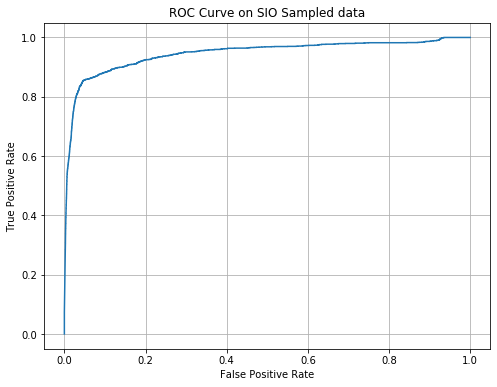

In [19]:
y_pred = model.predict(X)

from sklearn.metrics import roc_curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, y_pred)
#plt.plot(fpr, tpr)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_1000)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve on SIO Sampled data")
plt.grid()
plt.show()

In [20]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/NGDC/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 10) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

500


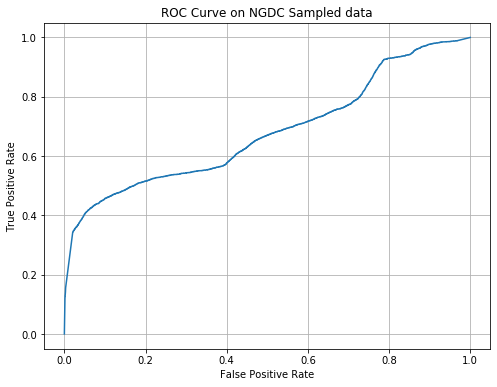

In [21]:
y_pred = model.predict(X)

from sklearn.metrics import roc_curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y, y_pred)
#plt.plot(fpr, tpr)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_1000)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve on NGDC Sampled data")
plt.grid()
plt.show()

# okay so now let's try and find thresholds, we can start this just doing it with the NGDC data since we've got it loaded

In [26]:
# first let's build a cost function
# so the predictions rn are between 0 and 1 --> so we want to print out good bad or idk
# our labeling: if y is 1 its bad, if its 0 its good

def loss(y_true, y_pred):
    totalLoss = 0
    for elt in range(0, len(y_pred)):
        # if prediction is wrong
        if y_pred[elt] != y_true[elt]:
            totalLoss += -3
        # if prediction is equal to true label
        elif y_pred[elt] == y_true[elt]:
            totalLoss += 1
        # if prediction is equal to 'idk'
        else:
            break # do nothing
    return totalLoss
            
low_thresh = 0.25
upper_thresh = 0.75
def make_pred_thresh(low_thresh, upper_thresh, y_pred, y_true):
    y_pred_new = []
    for elt in y_pred:
        if elt < low_thresh:
            y_pred_new.append(0)
        elif elt < upper_thresh and elt >=low_thresh:
            y_pred_new.append(-1)
        else:
            y_pred_new.append(1)
    return loss(y_true, y_pred_new)
    
make_pred_thresh(low_thresh, upper_thresh, y_pred, y)


336946

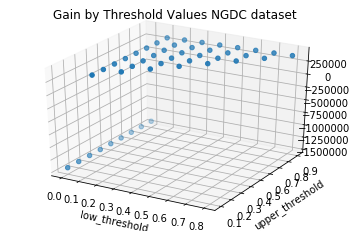

In [35]:
lowThreshRange = np.arange(0, 1, 0.1)
uppThreshRange = np.arange(0, 1, 0.1)

lt = []
ut = []
cost = []

for low_thresh in lowThreshRange:
    for upper_thresh in uppThreshRange:
        if upper_thresh > low_thresh:
            lt.append(low_thresh)
            ut.append(upper_thresh)
            cost.append(make_pred_thresh(low_thresh, upper_thresh, y_pred, y))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lt, ut, cost)
plt.xlabel('low_threshold')
plt.ylabel('upper_threshold')
plt.title("Gain by Threshold Values NGDC dataset")
plt.grid()
plt.show()

# note that the highter the "Gain" values the better 

# okay now do it for the SIO dataset

500


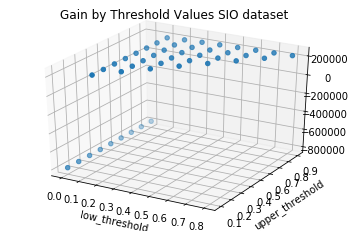

In [46]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/SIO/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 6) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

y_pred = model.predict(X)

lowThreshRange = np.arange(0, 1, 0.1)
uppThreshRange = np.arange(0, 1, 0.1)

lt = []
ut = []
cost = []

for low_thresh in lowThreshRange:
    for upper_thresh in uppThreshRange:
        if upper_thresh > low_thresh:
            lt.append(low_thresh)
            ut.append(upper_thresh)
            cost.append(make_pred_thresh(low_thresh, upper_thresh, y_pred, y))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lt, ut, cost)
plt.xlabel('low_threshold')
plt.ylabel('upper_threshold')
plt.title("Gain by Threshold Values SIO dataset")
plt.grid()
plt.show()

# note that the highter the "Gain" values the better 

# repeat for the JAMSTEC dataset

500


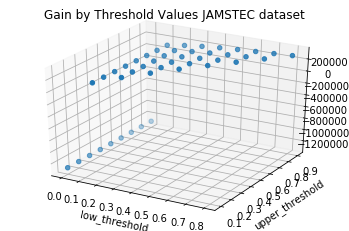

In [47]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/JAMSTEC/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 10) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

data = np.array(data)
# discard column 0, 1, 3, 4, 5
X = data[:, [0, 1, 2]+list(range(6,35))]

# normalize data
X = keras.utils.normalize(X, axis=0, order=2)
y = [int(x==9999) for x in data[:,4]]

y_pred = model.predict(X)

lowThreshRange = np.arange(0, 1, 0.1)
uppThreshRange = np.arange(0, 1, 0.1)

lt = []
ut = []
cost = []

for low_thresh in lowThreshRange:
    for upper_thresh in uppThreshRange:
        if upper_thresh > low_thresh:
            lt.append(low_thresh)
            ut.append(upper_thresh)
            cost.append(make_pred_thresh(low_thresh, upper_thresh, y_pred, y))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lt, ut, cost)
plt.xlabel('low_threshold')
plt.ylabel('upper_threshold')
plt.title("Gain by Threshold Values JAMSTEC dataset")
plt.grid()
plt.show()

# note that the highter the "Gain" values the better 

# and finally for the US_multi dataset

500


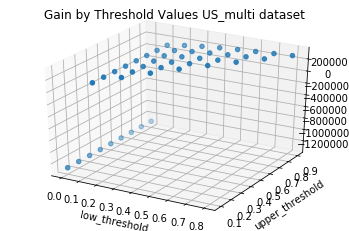

In [48]:
# this should be the path of one region, e.g. data/JAMSTEC2/
# print(os.getcwd())

datapath = '/home/ubuntu/data/US_multi/'
filenames = os.listdir(datapath)
print(len(filenames))
data = []
count = 0.0

import random
from random import sample
sample = random.sample(filenames, 10) ## randomly sample some files

for filename in sample:
    count += 1
    print("Loading {:.2%}".format(count/len(filenames)), end="\r")
    file = open(datapath + filename)
    for line in file:
        features = line.split()
        features = list(map(float, features[:-1]))
        if np.isnan(sum(features)):
            continue
        data.append(features)
    file.close()

y_pred = model.predict(X)

lowThreshRange = np.arange(0, 1, 0.1)
uppThreshRange = np.arange(0, 1, 0.1)

lt = []
ut = []
cost = []

for low_thresh in lowThreshRange:
    for upper_thresh in uppThreshRange:
        if upper_thresh > low_thresh:
            lt.append(low_thresh)
            ut.append(upper_thresh)
            cost.append(make_pred_thresh(low_thresh, upper_thresh, y_pred, y))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lt, ut, cost)
plt.xlabel('low_threshold')
plt.ylabel('upper_threshold')
plt.title("Gain by Threshold Values US_multi dataset")
plt.grid()
plt.show()

# note that the highter the "Gain" values the better 